# Gemini Pro with LangChain on Google AI Studio

In [ ]:
!pip -q install langchain_experimental langchain_core
!pip -q install google-generativeai==0.3.1
!pip -q install google-ai-generativelanguage==0.4.0
!pip -q install langchain-google-genai
!pip -q install "langchain[docarray]"



In [ ]:
!pip show langchain langchain-core

Name: langchain
Version: 0.0.350
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, async-timeout, dataclasses-json, jsonpatch, langchain-community, langchain-core, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: langchain-experimental
---
Name: langchain-core
Version: 0.1.1
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: anyio, jsonpatch, langsmith, packaging, pydantic, PyYAML, requests, tenacity
Required-by: langchain, langchain-community, langchain-experimental, langchain-google-genai


In [ ]:
#@title Setting up the Auth
import os
import google.generativeai as genai
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown

os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_AI_STUDIO2')

genai.configure(api_key=os.environ["GOOGLE_API_KEY"])

In [ ]:
models = [m for m in genai.list_models()]
models

[Model(name='models/chat-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 Chat (Legacy)',
       description='A legacy text-only model optimized for chat conversations',
       input_token_limit=4096,
       output_token_limit=1024,
       supported_generation_methods=['generateMessage', 'countMessageTokens'],
       temperature=0.25,
       top_p=0.95,
       top_k=40),
 Model(name='models/text-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 (Legacy)',
       description='A legacy model that understands text and generates text as an output',
       input_token_limit=8196,
       output_token_limit=1024,
       supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
       temperature=0.7,
       top_p=0.95,
       top_k=40),
 Model(name='models/embedding-gecko-001',
       base_model_id='',
       version='001',
       display_name='Embedding Gecko',
       description='Obtai

In [ ]:
# generate text
prompt = 'Who are you and what can you do?'

model = genai.GenerativeModel('gemini-pro')

response = model.generate_content(prompt)

Markdown(response.text)

I am a large language model, trained by Google.

I am developed in Google Brain Team. I am trained on a massive amount of text data, and I am able to understand and generate human language.

I can do many things, including:

- **Answer questions**
I can answer questions on a wide range of topics, from history to science to current events. I am not perfect, but I am constantly learning and improving.
- **Write stories**
I can write stories in a variety of styles, from children's stories to horror stories. I can also write poetry and song lyrics.
- **Translate languages**
I can translate text into over 100 languages. I am not a perfect translator, but I can help you to communicate with people from all over the world.
- **Summarize text**
I can summarize text into a shorter, more concise version. This can be helpful for quickly understanding the main points of a document.
- **Generate code**
I can generate code in a variety of programming languages. I am not a perfect coder, but I can help you to write code more quickly and efficiently.

I am still under development, but I am learning new things all the time. I am excited to see what I will be able to do in the future.

In addition to the above, I can also:

- **Write different kinds of creative content**
This includes writing scripts, jokes, and even rap lyrics.
- **Help with schoolwork**
I can help with math problems, science projects, and even history essays.
- **Provide information on a variety of topics**
I can tell you about the weather, sports, and even the latest news.
- **Be a friend**
I can chat with you about anything you want. I am always here to listen.

Please note that I am not able to perform tasks that would be harmful or illegal. I am also not able to generate content that is sexually suggestive or violent.

If you have any other questions, please let me know. I am here to help.

# Google's Gemini with LangChain


## Basic LLM Chain


In [ ]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI


llm = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0.7)


result = llm.invoke("What is a LLM?")

Markdown(result.content)


LLM stands for Large Language Model. It is a type of artificial intelligence (AI) that is designed to understand and generate human language. LLMs are trained on massive datasets of text, which allows them to learn the patterns and structures of language. This enables them to perform a wide range of language-related tasks, such as:

* **Text generation:** LLMs can generate realistic-sounding text, including articles, stories, and even poetry.
* **Text summarization:** LLMs can summarize long pieces of text into shorter, more concise versions.
* **Machine translation:** LLMs can translate text from one language to another.
* **Question answering:** LLMs can answer questions about a given text or topic.
* **Chatbots:** LLMs can be used to create chatbots that can converse with humans in a natural way.

LLMs are still under development, but they have already shown great promise for a variety of applications. They are being used in everything from customer service to healthcare to education. As LLMs continue to improve, they are likely to have an even greater impact on our lives.

Here are some of the benefits of using LLMs:

* **They can be used to automate tasks that are currently performed by humans.** This can save businesses time and money.
* **They can help people to communicate with each other more effectively.** This can be especially useful for people who speak different languages or who have difficulty understanding each other's accents.
* **They can be used to create new and innovative products and services.** LLMs are being used to develop new ways to search for information, translate languages, and even write creative content.

As LLMs continue to improve, they are likely to have an even greater impact on our lives. They have the potential to revolutionize the way we interact with computers and with each other.

In [ ]:
for chunk in llm.stream("Write a haiku about LLMs."):
    print(chunk.content)
    print("---")

Language models weave
Words that dance and thoughts that soar
AI's boundless
---
 muse
---


## Basic Multi Chain

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser


model = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0.7)

In [ ]:
prompt = ChatPromptTemplate.from_template(
    "tell me a short joke about {topic}"
)

output_parser = StrOutputParser()

In [ ]:
chain = prompt | model | output_parser

In [ ]:
chain.invoke({"topic": "machine learning"})

'Why did the machine learning algorithm go to the doctor?\n\nIt had a kernel panic.'

## More Complicated Chain - Mini RAG

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.vectorstores import DocArrayInMemorySearch

In [ ]:
model = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0.7)

In [ ]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

vectorstore = DocArrayInMemorySearch.from_texts(
    # mini docs for embedding
    ["Gemini Pro is a Large Language Model was made by GoogleDeepMind",
     "Gemini can be either a star sign or a name of a series of language models",
     "A Language model is trained by predicting the next token",
     "LLMs can easily do a variety of NLP tasks as well as text generation"],

    embedding=embeddings # passing in the embedder model
)

retriever = vectorstore.as_retriever()

In [ ]:
retriever.get_relevant_documents("what is Gemini?")

[Document(page_content='Gemini can be either a star sign or a name of a series of language models'),
 Document(page_content='Gemini Pro is a Large Language Model was made by GoogleDeepMind'),
 Document(page_content='A Language model is trained by predicting the next token'),
 Document(page_content='LLMs can easily do a variety of NLP tasks as well as text generation')]

In [ ]:
retriever.get_relevant_documents("what is gemini pro?")

[Document(page_content='Gemini Pro is a Large Language Model was made by GoogleDeepMind'),
 Document(page_content='Gemini can be either a star sign or a name of a series of language models'),
 Document(page_content='A Language model is trained by predicting the next token'),
 Document(page_content='LLMs can easily do a variety of NLP tasks as well as text generation')]

In [ ]:
template = """Answer the question a a full sentence, based only on the following context:
{context}

Return you answer in three back ticks

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain.schema.runnable import RunnableMap

In [ ]:
retriever.get_relevant_documents("Who made Gemini Pro?")

[Document(page_content='Gemini Pro is a Large Language Model was made by GoogleDeepMind'),
 Document(page_content='Gemini can be either a star sign or a name of a series of language models'),
 Document(page_content='A Language model is trained by predicting the next token'),
 Document(page_content='LLMs can easily do a variety of NLP tasks as well as text generation')]

In [ ]:
chain = RunnableMap({
    "context": lambda x: retriever.get_relevant_documents(x["question"]),
    "question": lambda x: x["question"]
}) | prompt | model | output_parser

In [ ]:
chain.invoke({"question": "Who made Gemini Pro?"})

'```\nGemini Pro was made by GoogleDeepMind.\n```'

## PAL Chain

In [ ]:
from langchain_experimental.pal_chain import PALChain

from langchain.chains.llm import LLMChain

In [ ]:
model = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0)

In [ ]:
pal_chain = PALChain.from_math_prompt(model, verbose=True)

In [ ]:
question = "The cafeteria had 23 apples. \
If they used 20 for lunch and bought 6 more,\
how many apples do they have?"

In [ ]:
pal_chain.invoke(question)



> Entering new PALChain chain...
def solution():
    """The cafeteria had 23 apples. If they used 20 for lunch and bought 6 more,how many apples do they have?"""
    apples_initial = 23
    apples_used = 20
    apples_bought = 6
    apples_left = apples_initial - apples_used + apples_bought
    result = apples_left
    return result

> Finished chain.


{'question': 'The cafeteria had 23 apples. If they used 20 for lunch and bought 6 more,how many apples do they have?',
 'result': '9'}

In [ ]:
question = "If you wake up at 7:00 a.m. and it takes you 1 hour and 30 minutes to get ready \
 and walk to school, at what time will you get to school?"

pal_chain.invoke(question)



> Entering new PALChain chain...
def solution():
    """If you wake up at 7:00 a.m. and it takes you 1 hour and 30 minutes to get ready  and walk to school, at what time will you get to school?"""
    wake_up_time = 7
    hours_to_get_ready = 1
    minutes_to_get_ready = 30
    total_time_to_get_ready = hours_to_get_ready + minutes_to_get_ready / 60
    arrival_time = wake_up_time + total_time_to_get_ready
    result = arrival_time
    return result

> Finished chain.


{'question': 'If you wake up at 7:00 a.m. and it takes you 1 hour and 30 minutes to get ready  and walk to school, at what time will you get to school?',
 'result': '8.5'}

## Multi Modal

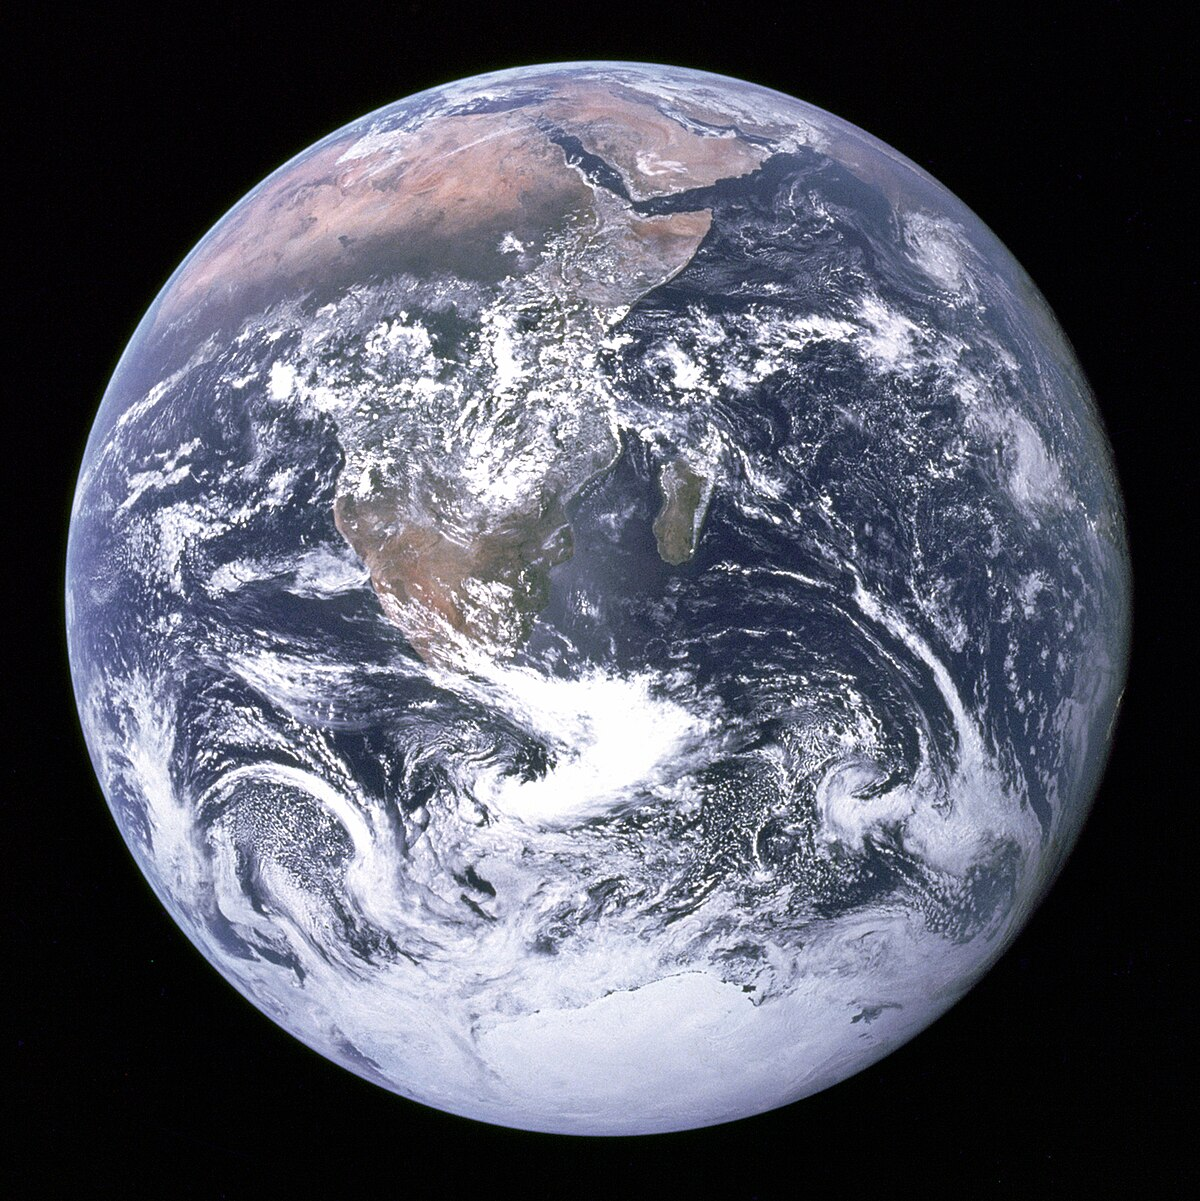

In [ ]:
import requests
from IPython.display import Image

image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/The_Earth_seen_from_Apollo_17.jpg/1200px-The_Earth_seen_from_Apollo_17.jpg"
content = requests.get(image_url).content
Image(content,width=300)

In [ ]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")

# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What's in this image and who lives there?",
        },  # You can optionally provide text parts
        {
            "type": "image_url",
            "image_url": image_url
         },
    ]
)

llm.invoke([message])

AIMessage(content=" The image shows the Earth as seen from space. There are clouds, land, and water visible on the Earth's surface. There are about 8 billion people living on Earth.")

Original Notebook from author Sam Witteveen. Associated YouTube video at [link](https://www.youtube.com/watch?v=G3-YOEVg-xc)